# CWRU Dataset Analysis

## Inner

In [1]:
from scipy import io

inner1 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/inner/109.mat')
inner2 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/inner/110.mat')
inner3 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/inner/111.mat')
inner4 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/inner/112.mat')
inner1['X109_DE_time'], inner2['X110_DE_time']

(array([[ 0.010016  ],
        [-0.023788  ],
        [-0.00792933],
        ...,
        [-0.085136  ],
        [-0.05800933],
        [ 0.00542533]]),
 array([[ 0.03212677],
        [ 0.07823077],
        [ 0.16146831],
        ...,
        [-0.08845292],
        [-0.02899754],
        [ 0.00855323]]))

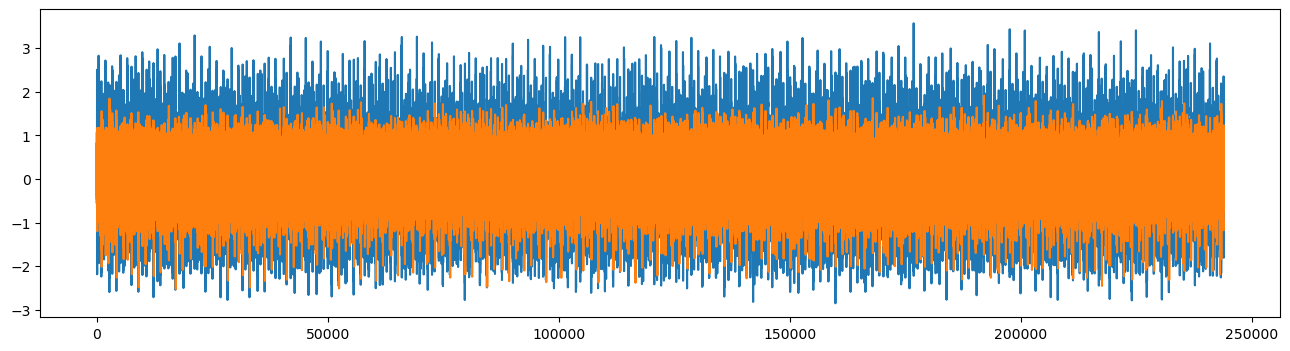

In [2]:
import matplotlib.pyplot as plt 

plt.figure(figsize=[16,4])
plt.plot(inner1['X109_DE_time'])
plt.plot(inner1['X109_FE_time'])
# plt.plot(inner1['X109RPM'])

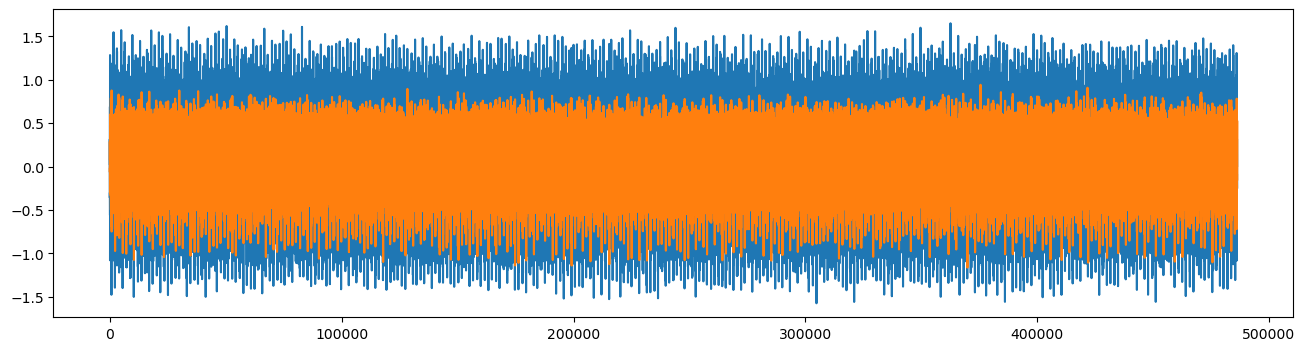

In [3]:
plt.figure(figsize=[16,4])
plt.plot(inner2['X110_DE_time'])
plt.plot(inner2['X110_FE_time'])

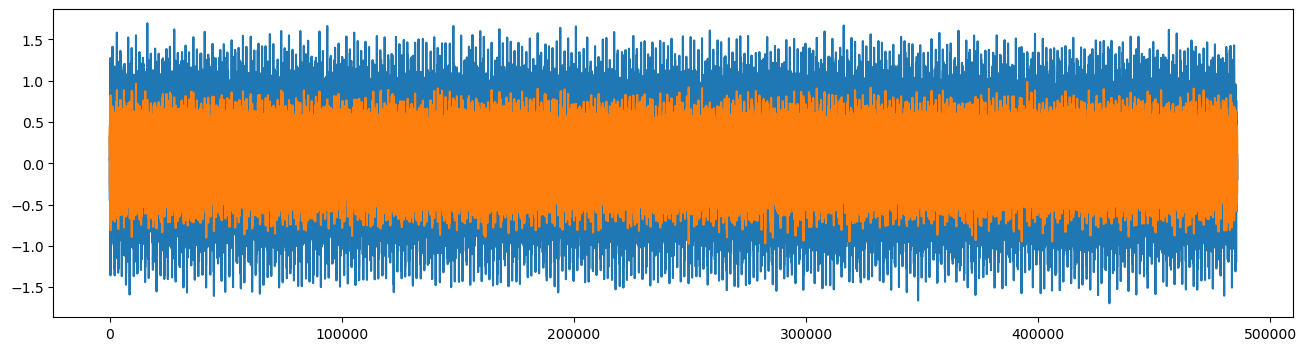

In [4]:
plt.figure(figsize=[16,4])
plt.plot(inner3['X111_DE_time'])
plt.plot(inner3['X111_FE_time'])

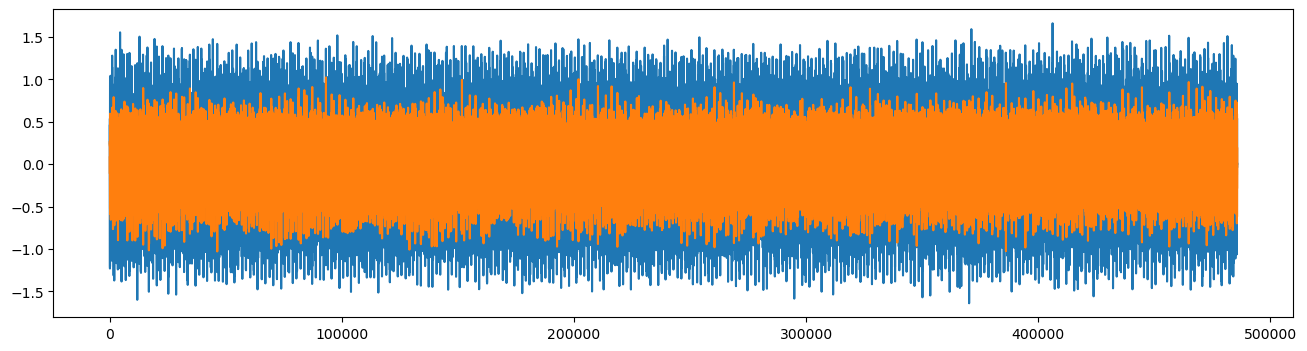

In [5]:
plt.figure(figsize=[16,4])
plt.plot(inner4['X112_DE_time'])
plt.plot(inner4['X112_FE_time'])

## Normal

In [6]:
from scipy import io

normal0 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/normal/97.mat')
normal1 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/normal/98.mat')
normal2 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/normal/99.mat')
normal3 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/normal/100.mat')

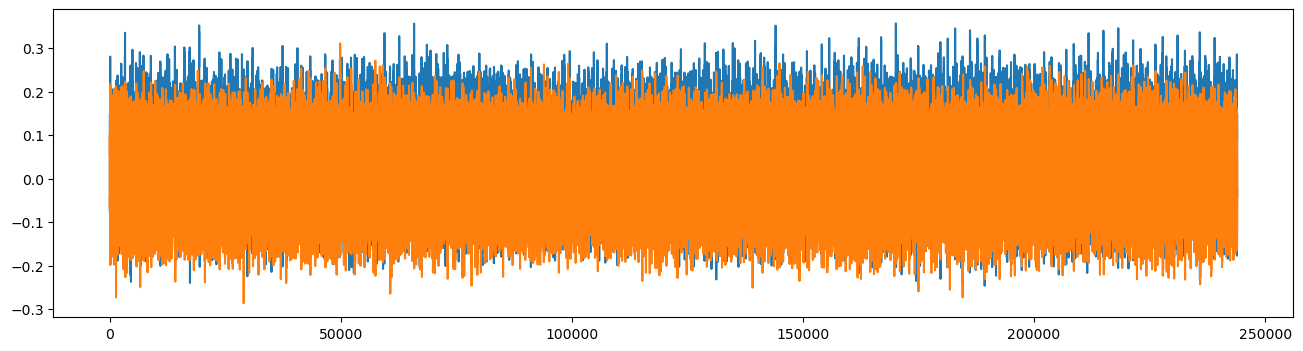

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=[16,4])
plt.plot(normal0['X097_FE_time'])
plt.plot(normal0['X097_DE_time'])

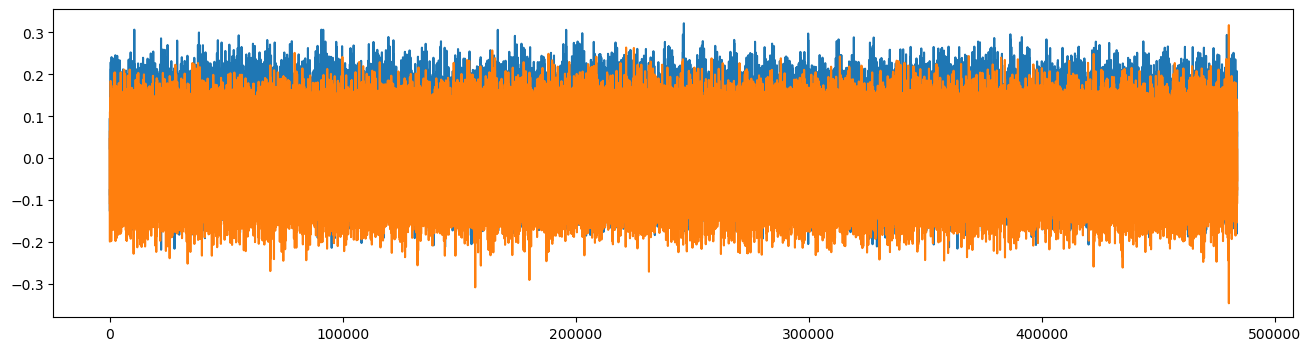

In [8]:
plt.figure(figsize=[16,4])
plt.plot(normal1['X098_FE_time'])
plt.plot(normal1['X098_DE_time'])

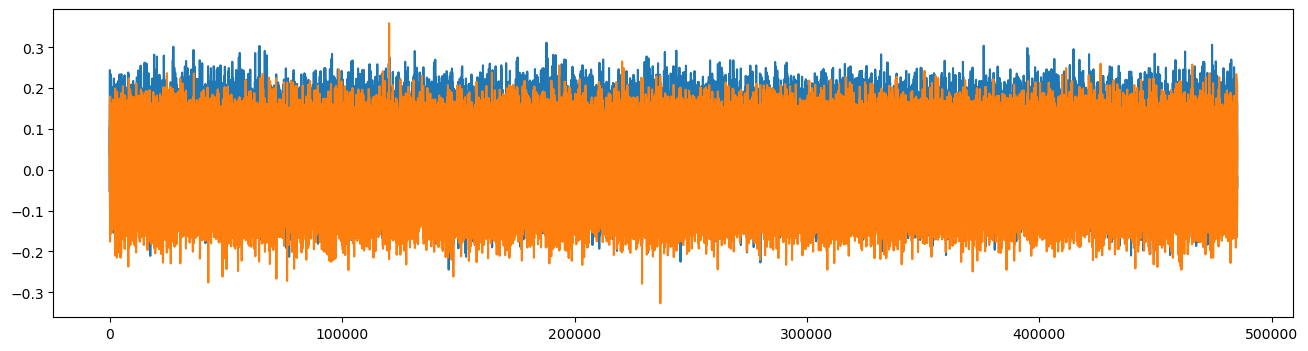

In [9]:
plt.figure(figsize=[16,4])
plt.plot(normal2['X099_FE_time'])
plt.plot(normal2['X099_DE_time'])

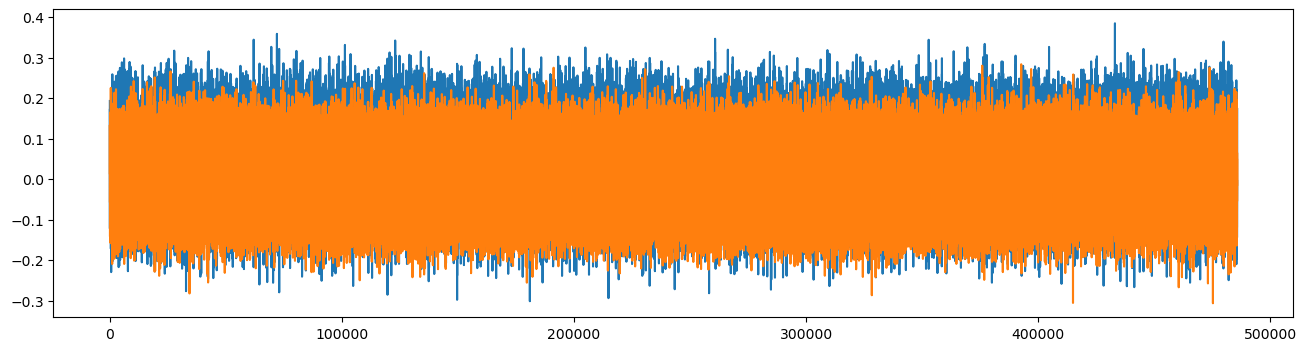

In [10]:
plt.figure(figsize=[16,4])
plt.plot(normal3['X100_FE_time'])
plt.plot(normal3['X100_DE_time'])

## balls

In [11]:
from scipy import io

ball0 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/ball/122.mat')
ball1 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/ball/123.mat')
ball2 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/ball/124.mat')
ball3 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/ball/125.mat')

In [12]:
ball0.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X122_DE_time', 'X122_FE_time', 'X122RPM'])

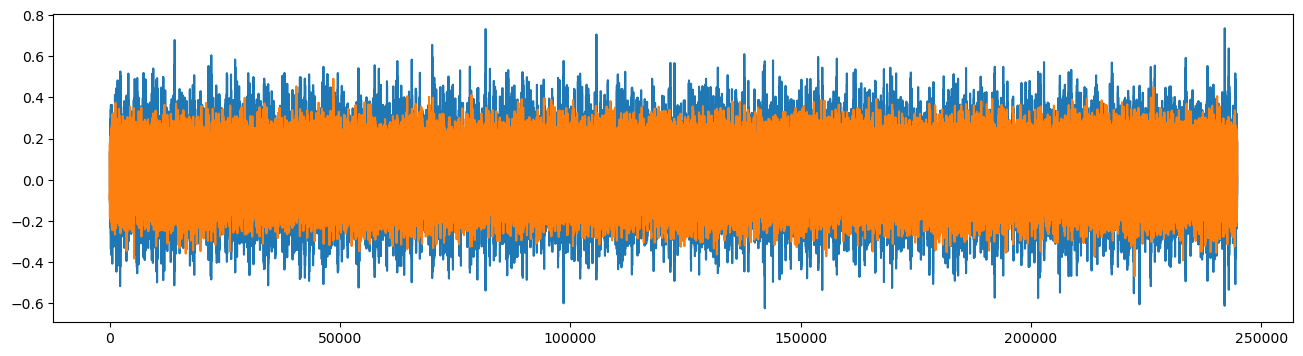

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=[16,4])
plt.plot(ball0['X122_DE_time'])
plt.plot(ball0['X122_FE_time'])

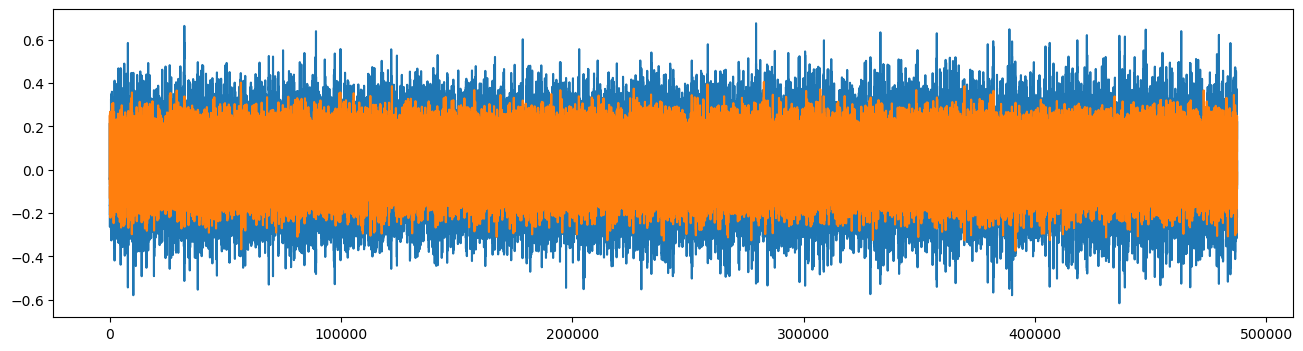

In [14]:
plt.figure(figsize=[16,4])
plt.plot(ball1['X123_DE_time'])
plt.plot(ball1['X123_FE_time'])

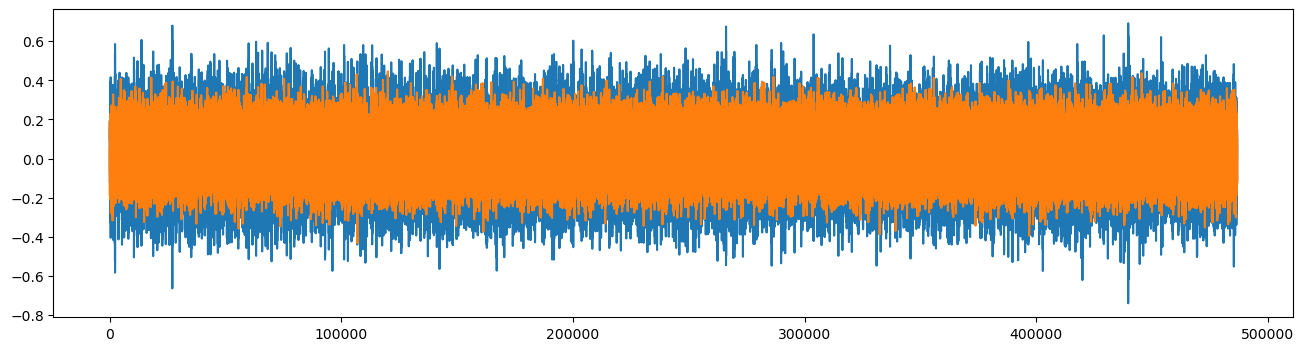

In [15]:
plt.figure(figsize=[16,4])
plt.plot(ball2['X124_DE_time'])
plt.plot(ball2['X124_FE_time'])

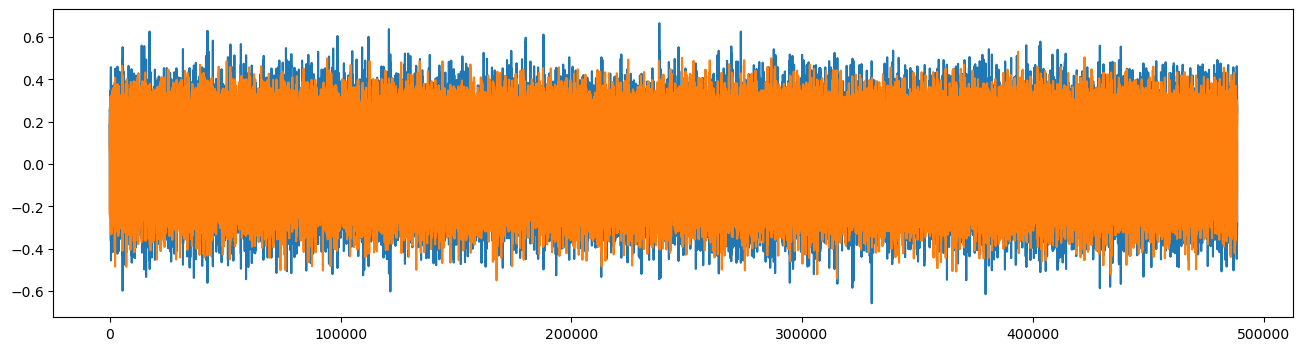

In [16]:
plt.figure(figsize=[16,4])
plt.plot(ball3['X125_DE_time'])
plt.plot(ball3['X125_FE_time'])

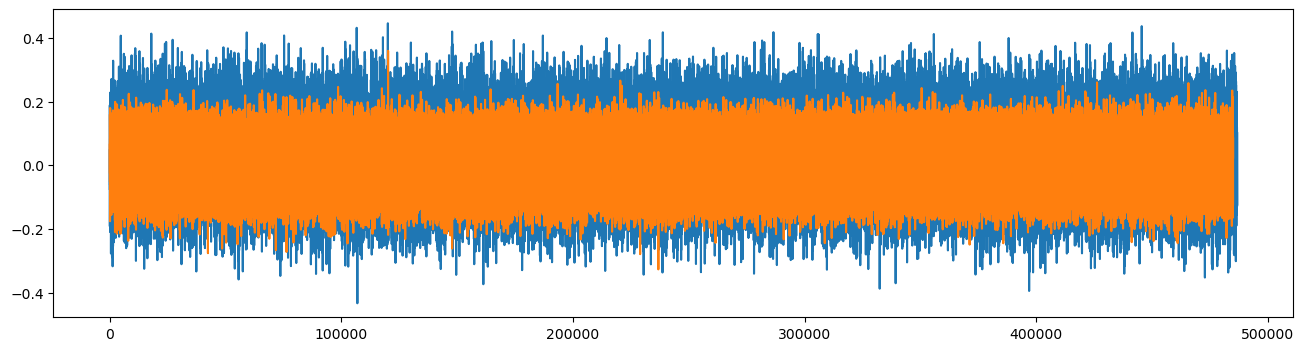

In [17]:
plt.figure(figsize=[16,4])
plt.plot(ball2['X124_FE_time'])
plt.plot(normal2['X099_DE_time'])

## outer

In [18]:
from scipy import io

outer0 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/outer/135.mat')
outer1 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/outer/136.mat')
outer2 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/outer/137.mat')
outer3 = io.loadmat('C:/Users/dk866/Desktop/bearing_test/data/cwru/outer/138.mat')

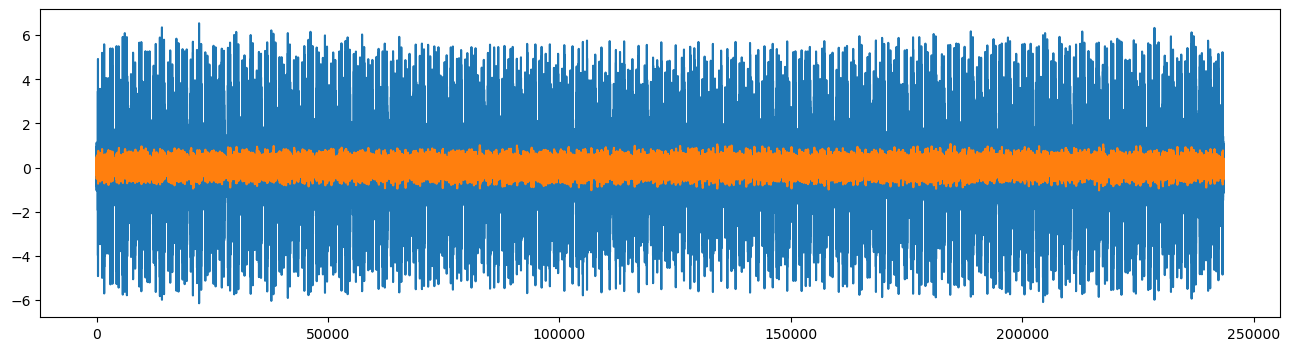

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=[16,4])
plt.plot(outer0['X135_DE_time'])
plt.plot(outer0['X135_FE_time'])

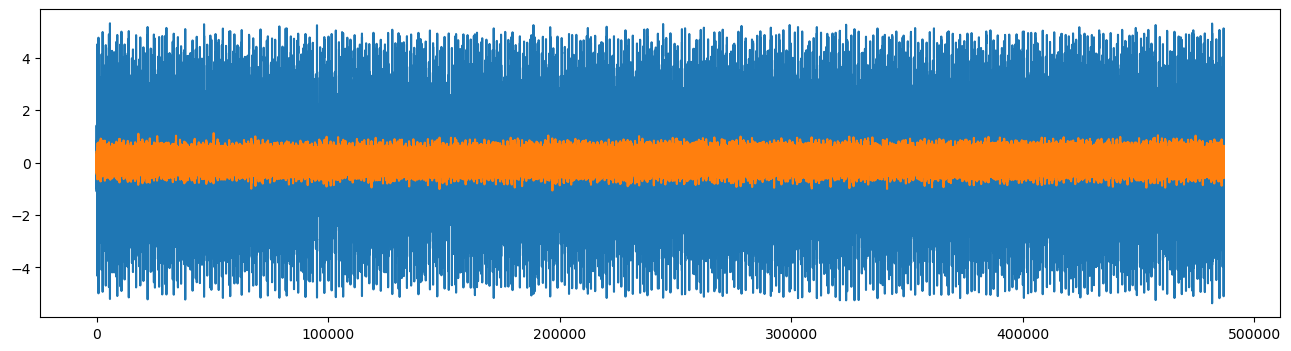

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=[16,4])
plt.plot(outer1['X136_DE_time'])
plt.plot(outer1['X136_FE_time'])

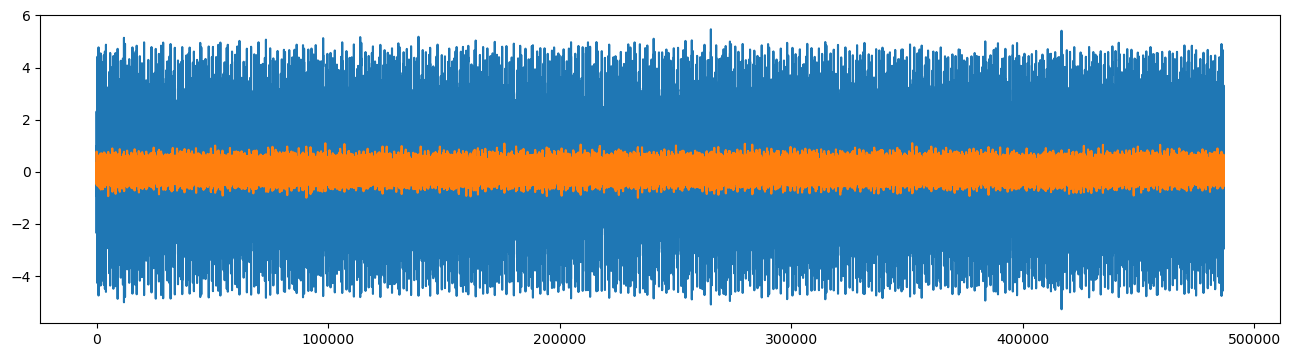

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=[16,4])
plt.plot(outer2['X137_DE_time'])
plt.plot(outer2['X137_FE_time'])

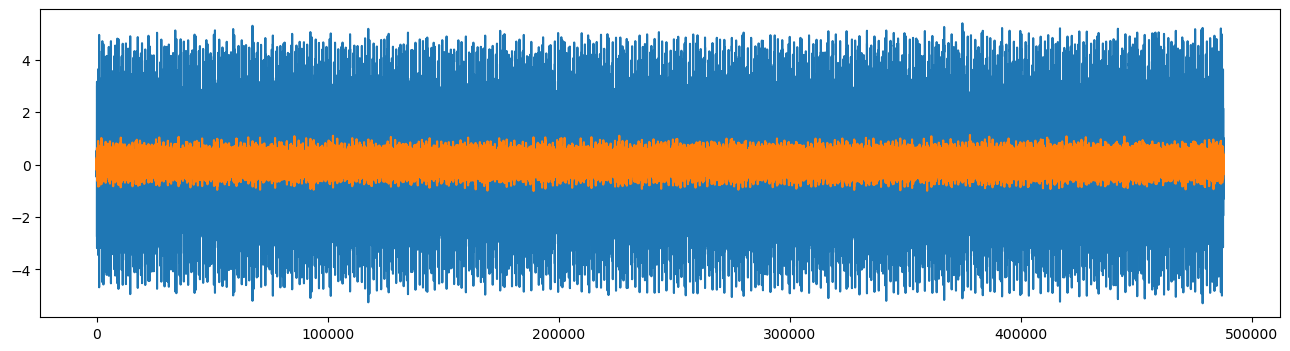

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=[16,4])
plt.plot(outer3['X138_DE_time'])
plt.plot(outer3['X138_FE_time'])

# Analysis

## 1. FFT

### 0


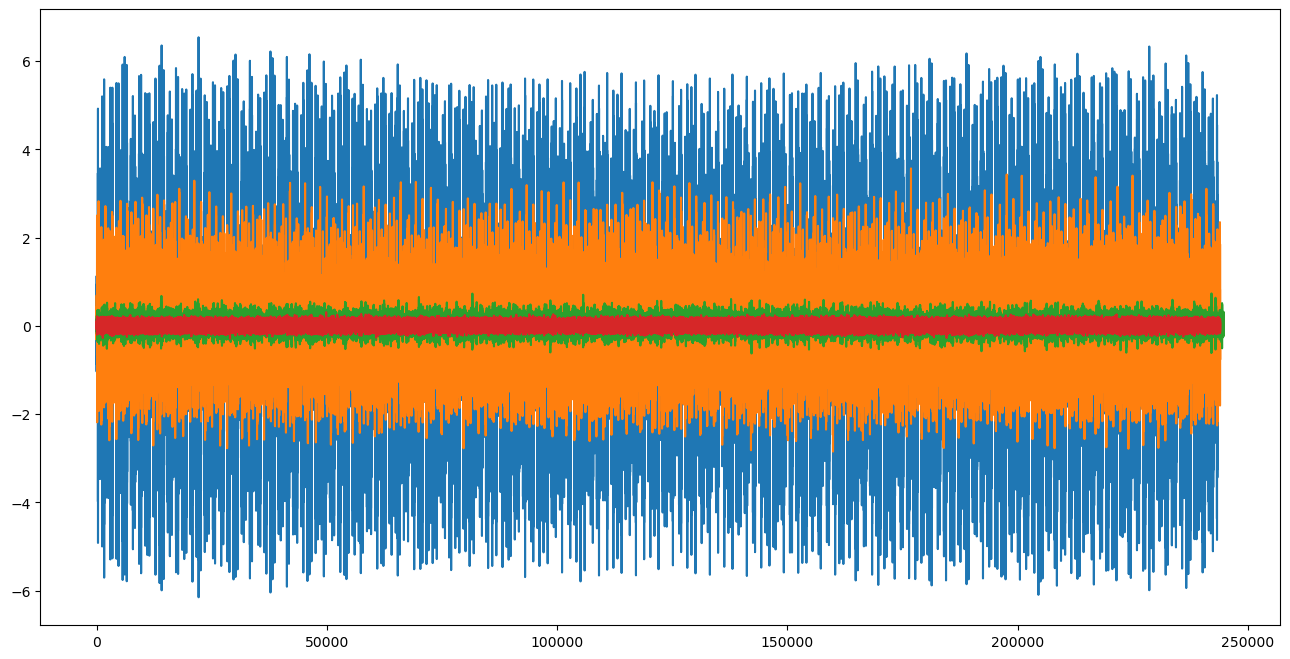

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize=[16,8])
plt.plot(outer0['X135_DE_time'])
plt.plot(inner1['X109_DE_time'])
plt.plot(ball0['X122_DE_time'])
plt.plot(normal0['X097_DE_time'])
# normal0, inner1, ball0, outer0

In [24]:
# FFT

import torch
import numpy as np

def calc_fft(data):
    Fs = 48000
    n = len(data)

    graph_data = torch.Tensor(data)
    graph_data.to("cuda:0")
    fft_data = torch.fft.rfft(graph_data) / n

    frequency = torch.arange(0.0, Fs/2.0, Fs/n)
    return frequency, fft_data

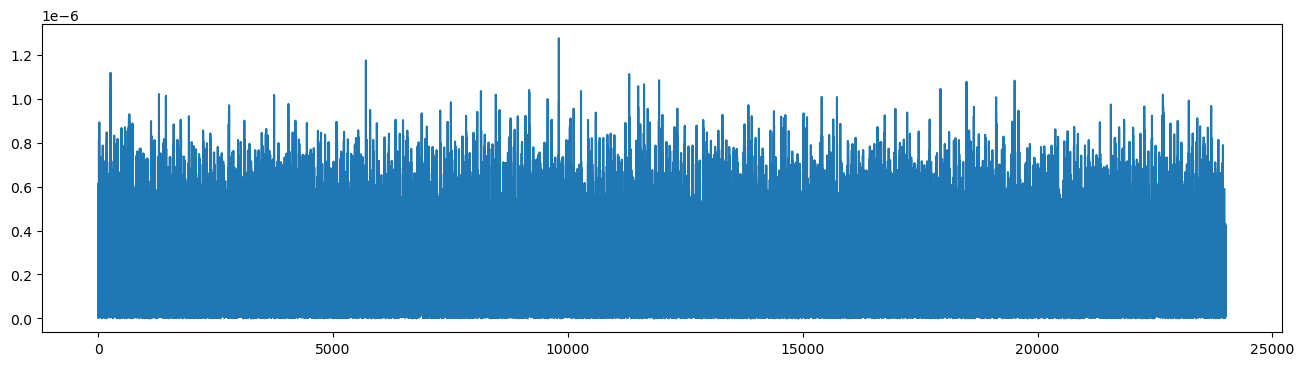

In [25]:
n_freq, n_fft = calc_fft(normal0['X097_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

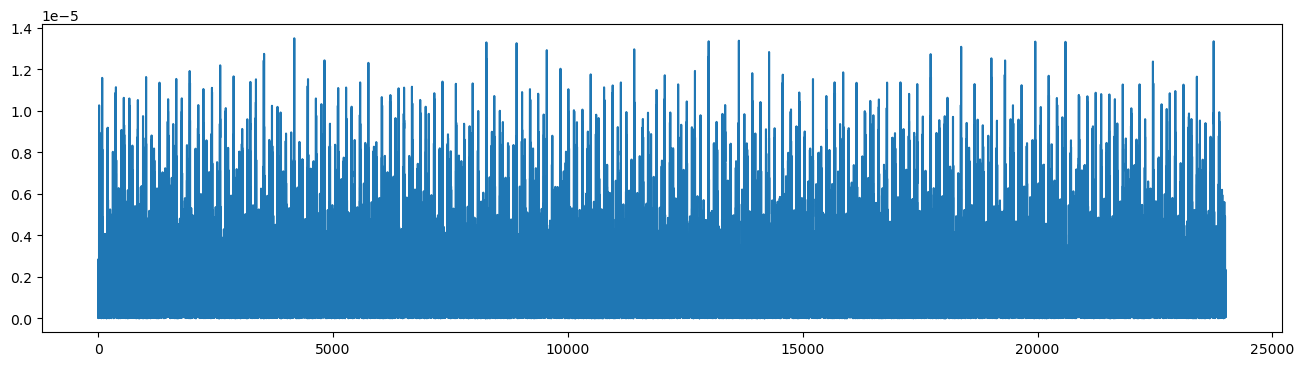

In [26]:
n_freq, n_fft = calc_fft(inner1['X109_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

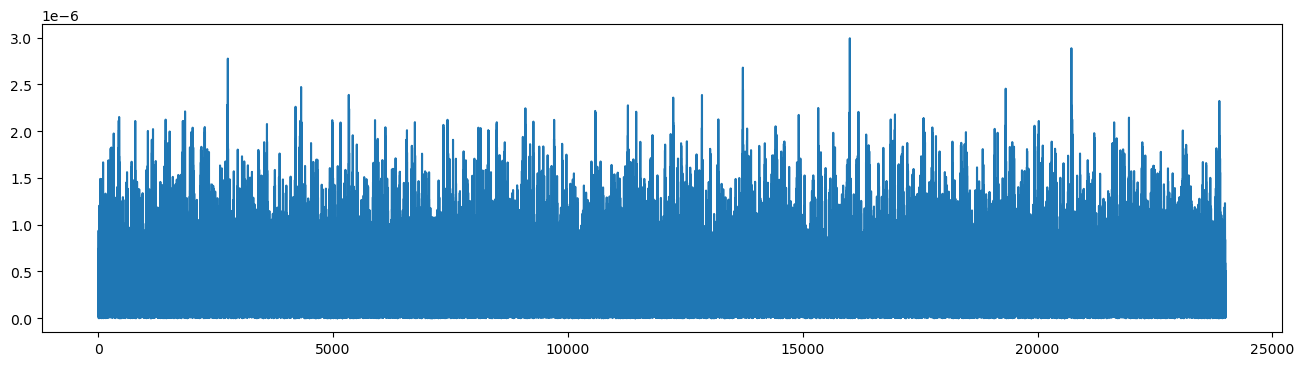

In [27]:
n_freq, n_fft = calc_fft(ball0['X122_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

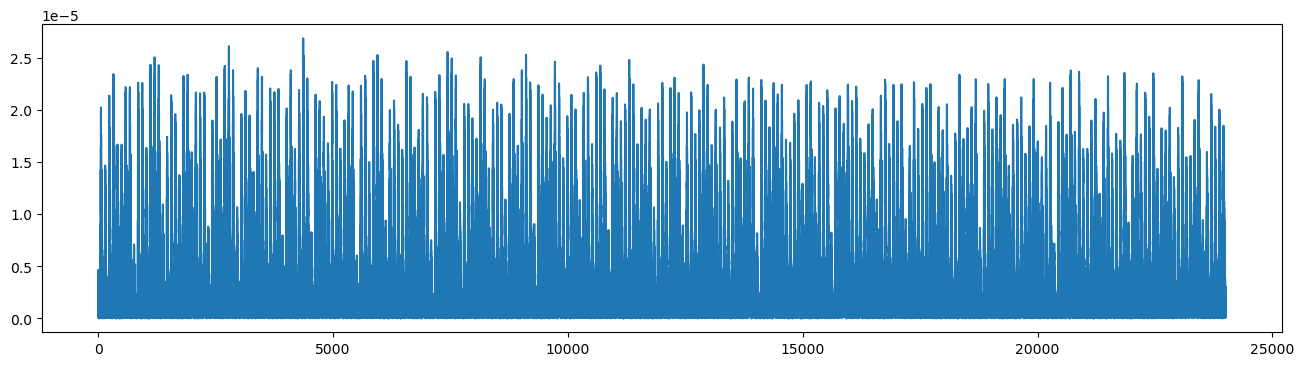

In [28]:
n_freq, n_fft = calc_fft(outer0['X135_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

### 1


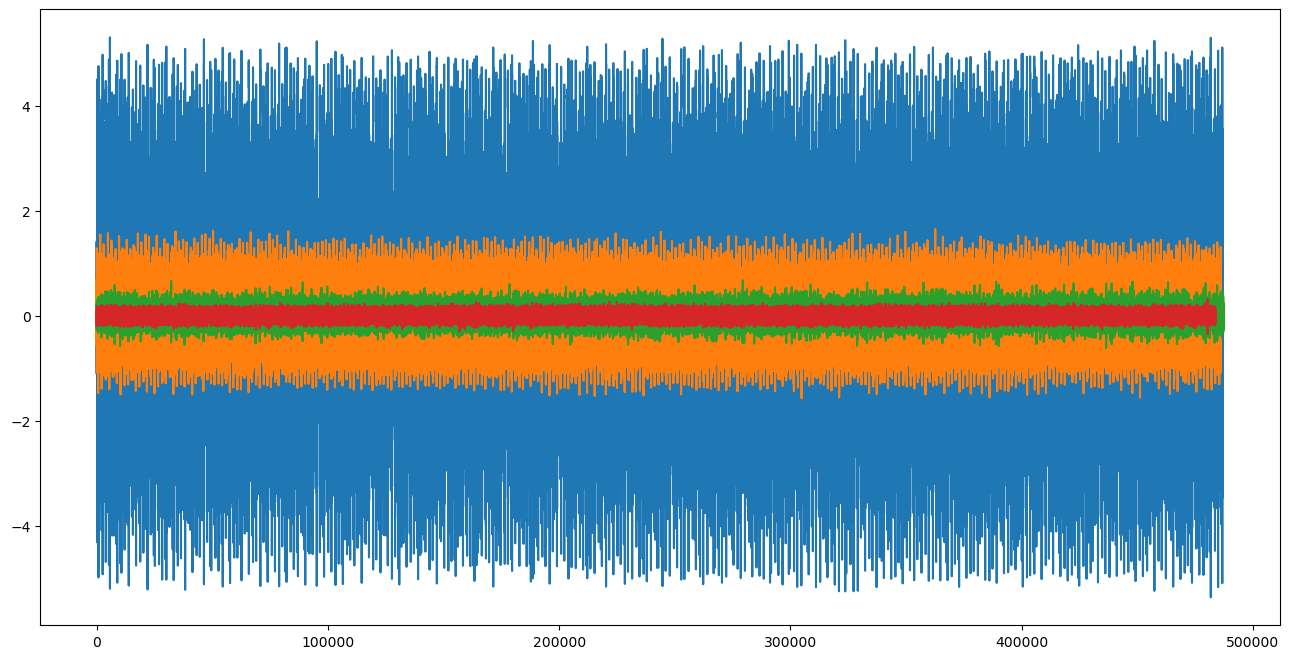

In [29]:
import matplotlib.pyplot as plt


plt.figure(figsize=[16,8])
plt.plot(outer1['X136_DE_time'])
plt.plot(inner2['X110_DE_time'])
plt.plot(ball1['X123_DE_time'])
plt.plot(normal1['X098_DE_time'])
# normal0, inner1, ball0, outer0

In [30]:
# FFT

import torch
import numpy as np

def calc_fft(data):
    Fs = 48000
    n = len(data)

    graph_data = torch.Tensor(data)
    graph_data.to("cuda:0")
    fft_data = torch.fft.rfft(graph_data) / n

    frequency = torch.arange(0.0, Fs/2.0, Fs/n)
    return frequency, fft_data

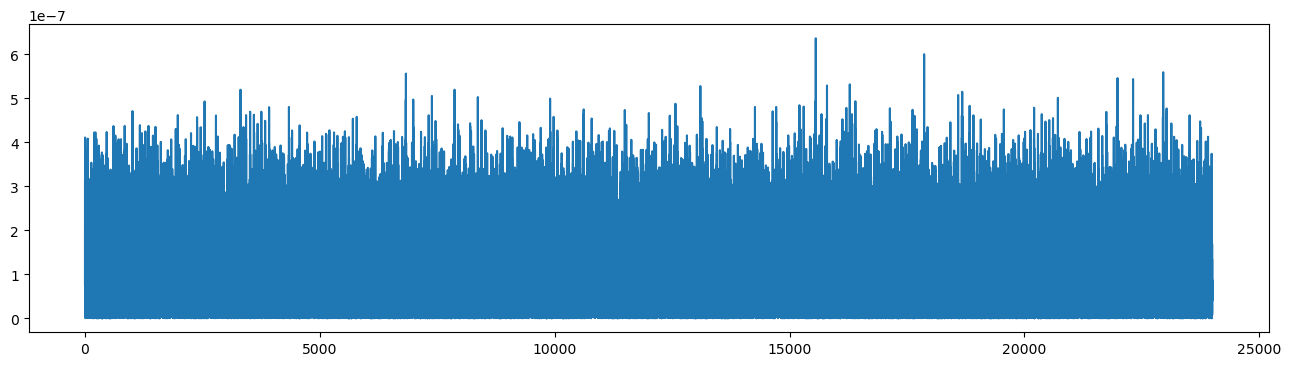

In [31]:
n_freq, n_fft = calc_fft(normal1['X098_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

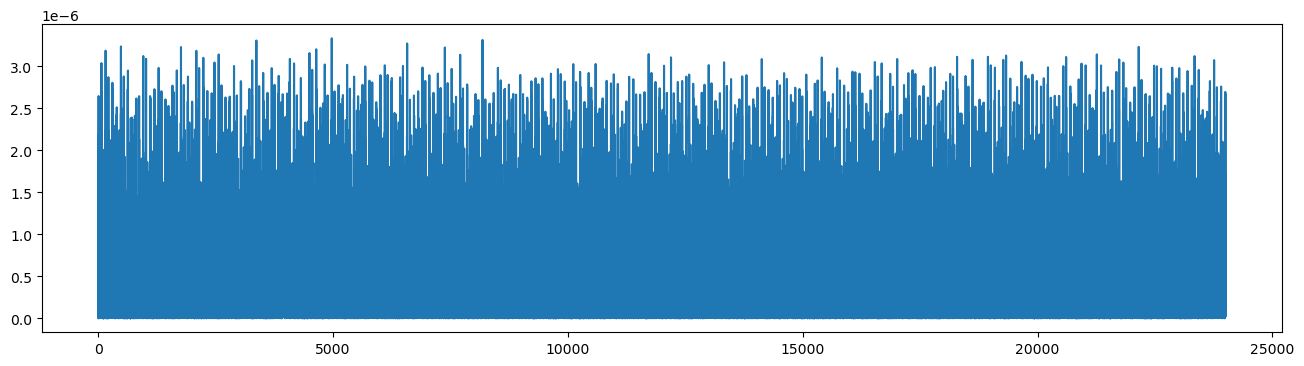

In [32]:
n_freq, n_fft = calc_fft(inner2['X110_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

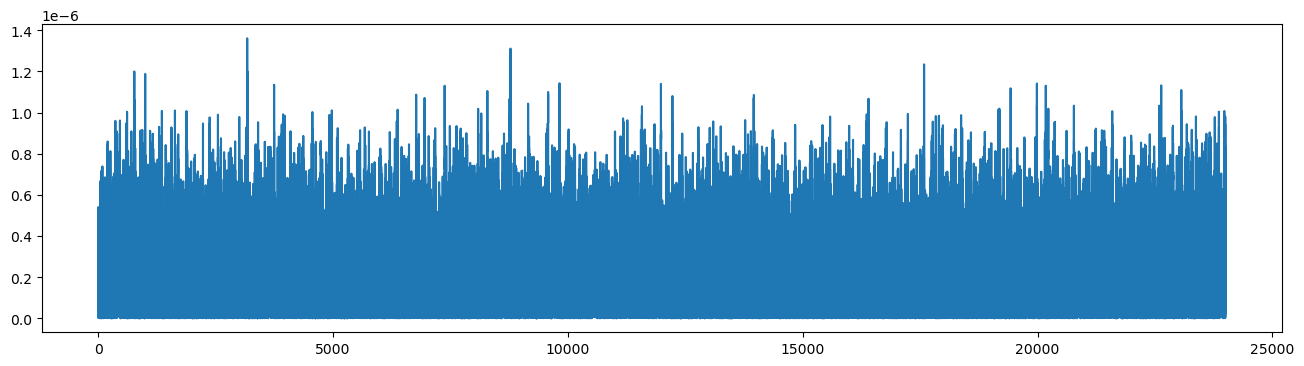

In [33]:
n_freq, n_fft = calc_fft(ball1['X123_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

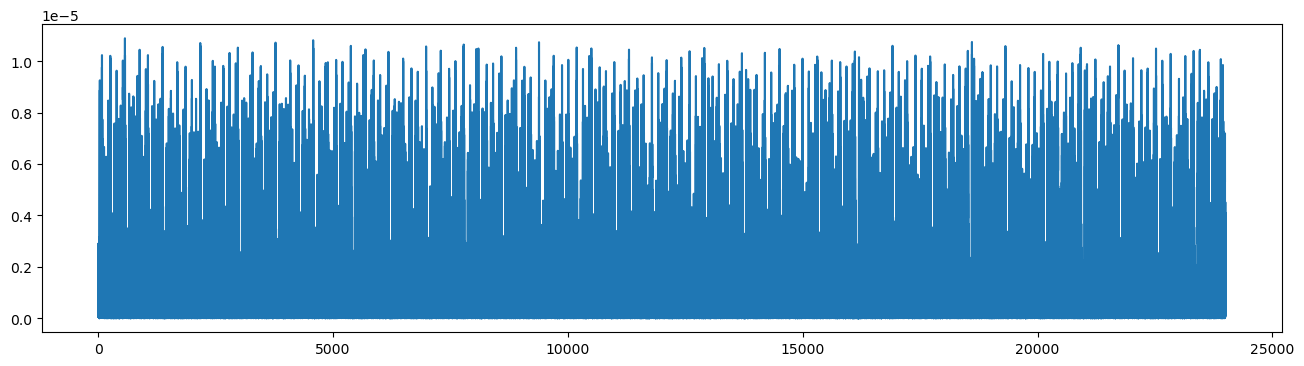

In [34]:
n_freq, n_fft = calc_fft(outer1['X136_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

### 2

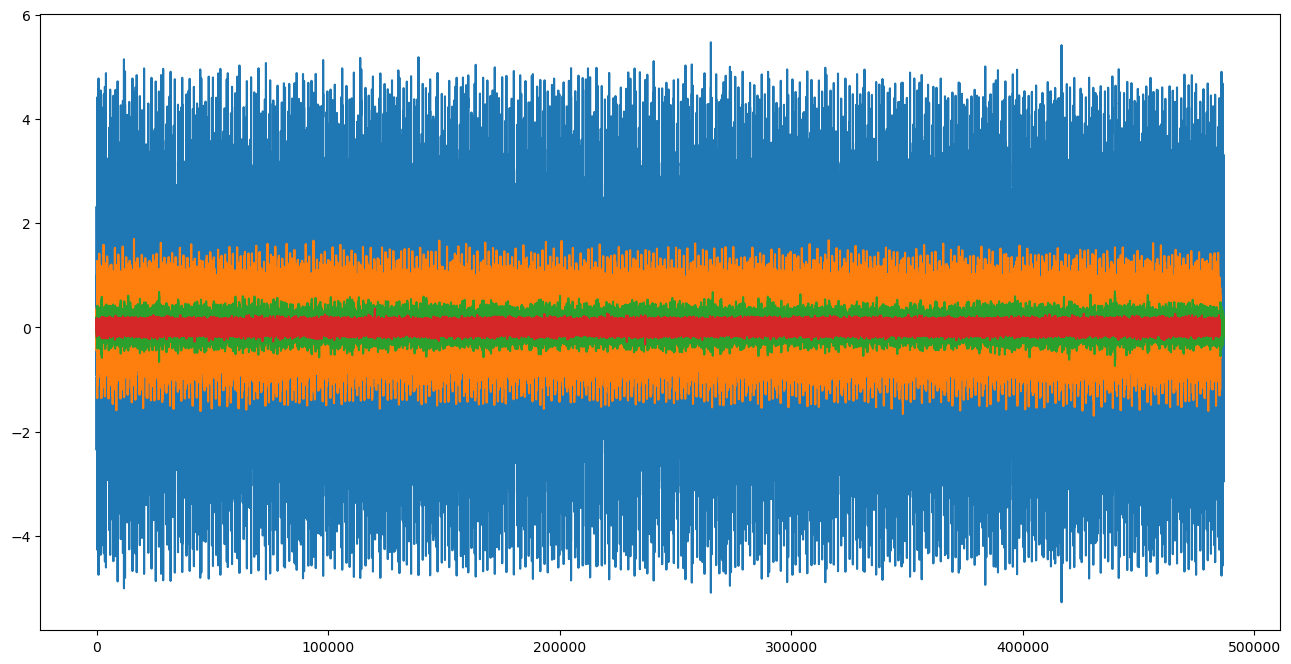

In [35]:
import matplotlib.pyplot as plt


plt.figure(figsize=[16,8])
plt.plot(outer2['X137_DE_time'])
plt.plot(inner3['X111_DE_time'])
plt.plot(ball2['X124_DE_time'])
plt.plot(normal2['X099_DE_time'])
# normal0, inner1, ball0, outer0

In [36]:
# FFT

import torch
import numpy as np

def calc_fft(data):
    Fs = 48000
    n = len(data)

    graph_data = torch.Tensor(data)
    graph_data.to("cuda:0")
    fft_data = torch.fft.rfft(graph_data) / n

    frequency = torch.arange(0.0, Fs/2.0, Fs/n)
    return frequency, fft_data

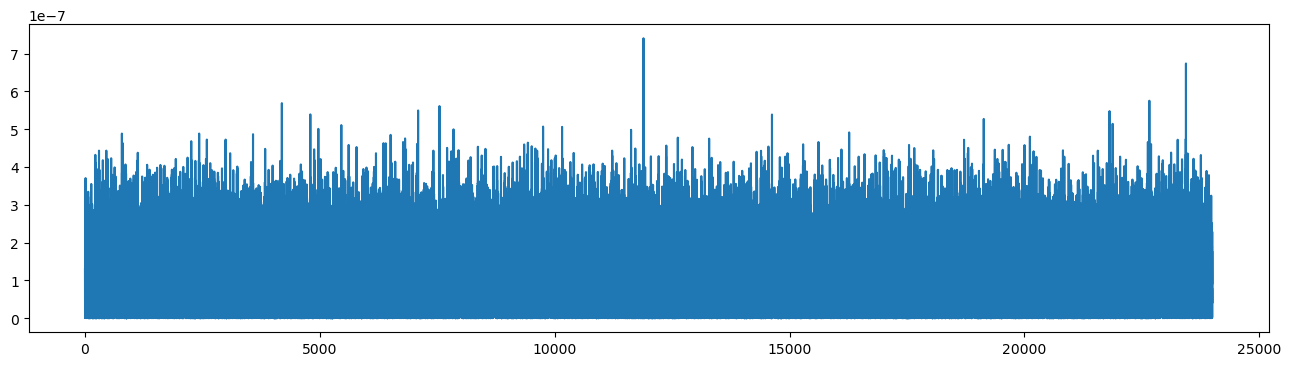

In [37]:
n_freq, n_fft = calc_fft(normal2['X099_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

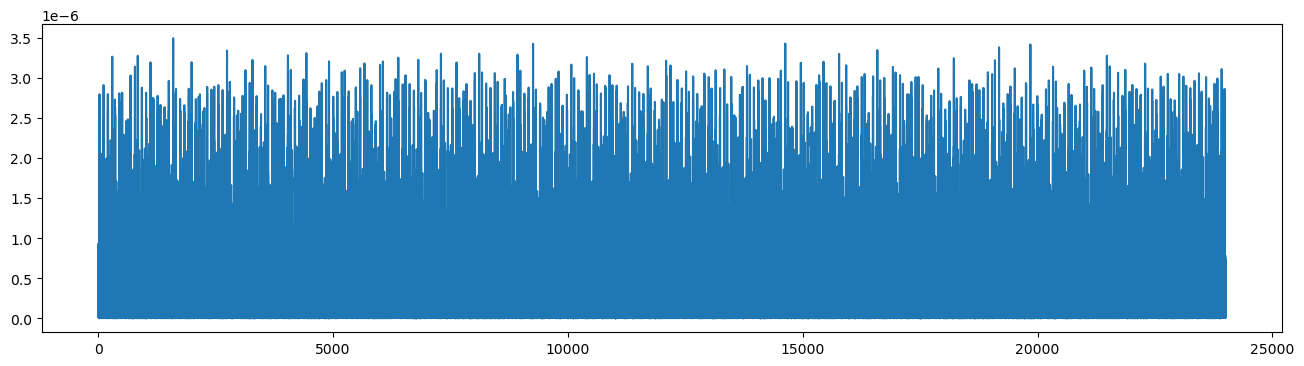

In [38]:
n_freq, n_fft = calc_fft(inner3['X111_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

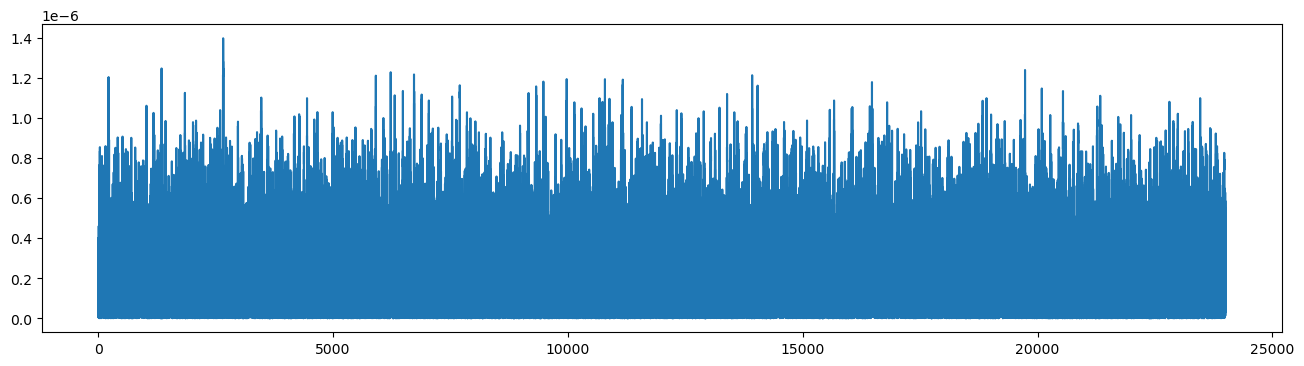

In [39]:
n_freq, n_fft = calc_fft(ball2['X124_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

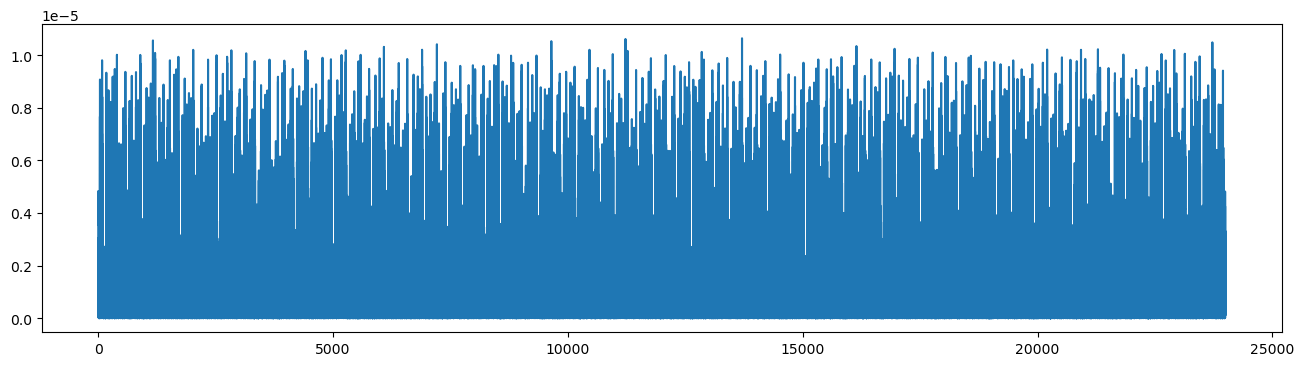

In [40]:
n_freq, n_fft = calc_fft(outer2['X137_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

### 3

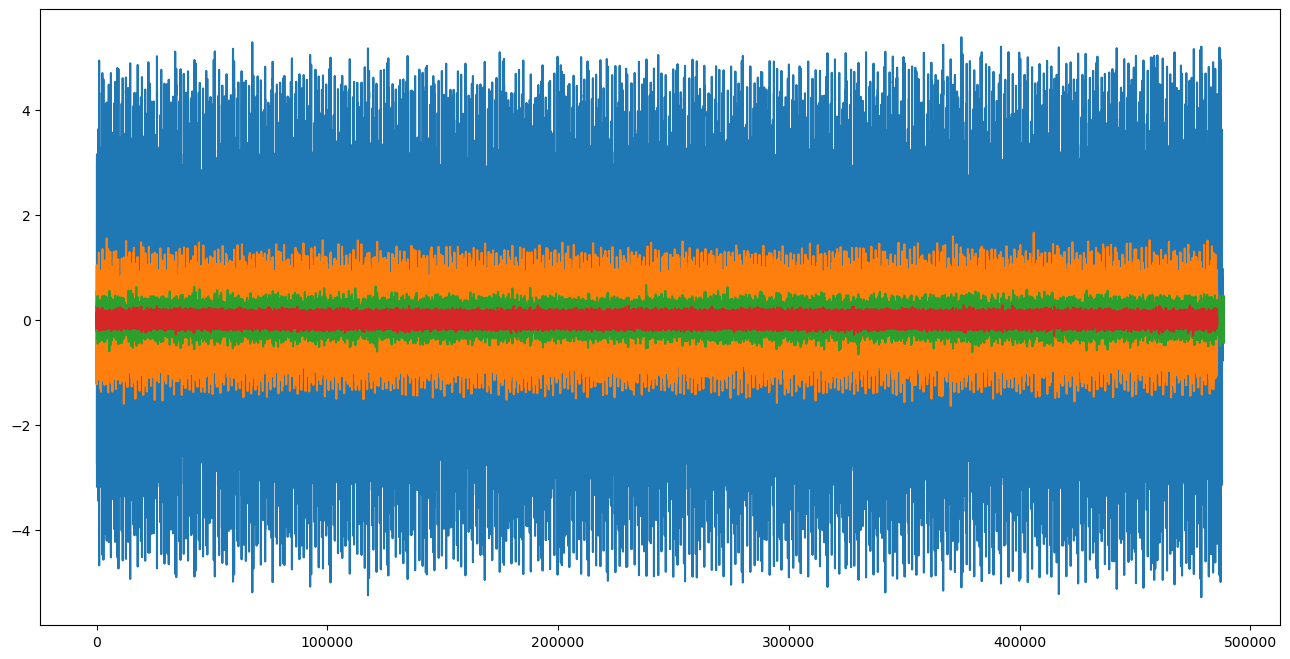

In [41]:
import matplotlib.pyplot as plt


plt.figure(figsize=[16,8])
plt.plot(outer3['X138_DE_time'])
plt.plot(inner4['X112_DE_time'])
plt.plot(ball3['X125_DE_time'])
plt.plot(normal3['X100_DE_time'])
# normal0, inner1, ball0, outer0

In [42]:
# FFT

import torch
import numpy as np

def calc_fft(data):
    Fs = 48000
    n = len(data)

    graph_data = torch.Tensor(data)
    graph_data.to("cuda:0")
    fft_data = torch.fft.rfft(graph_data) / n

    frequency = torch.arange(0.0, Fs/2.0, Fs/n)
    return frequency, fft_data

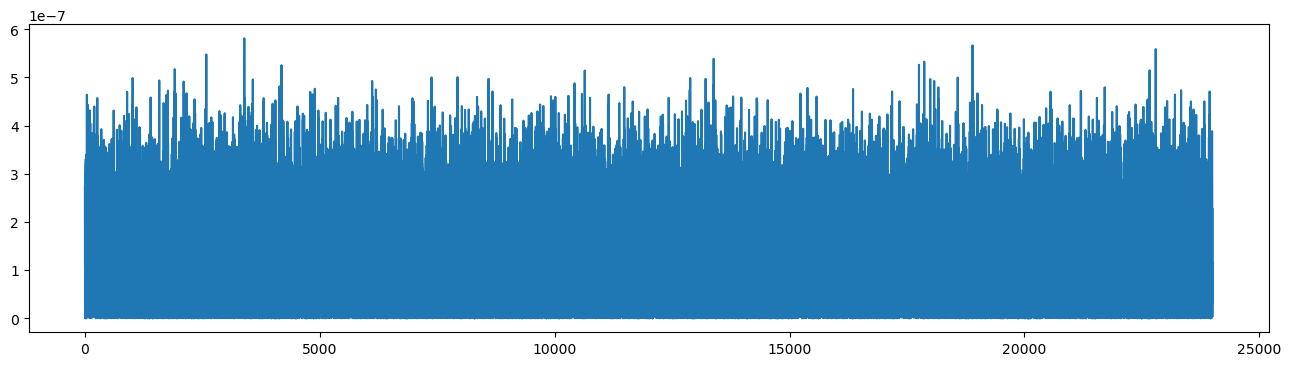

In [43]:
n_freq, n_fft = calc_fft(normal3['X100_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

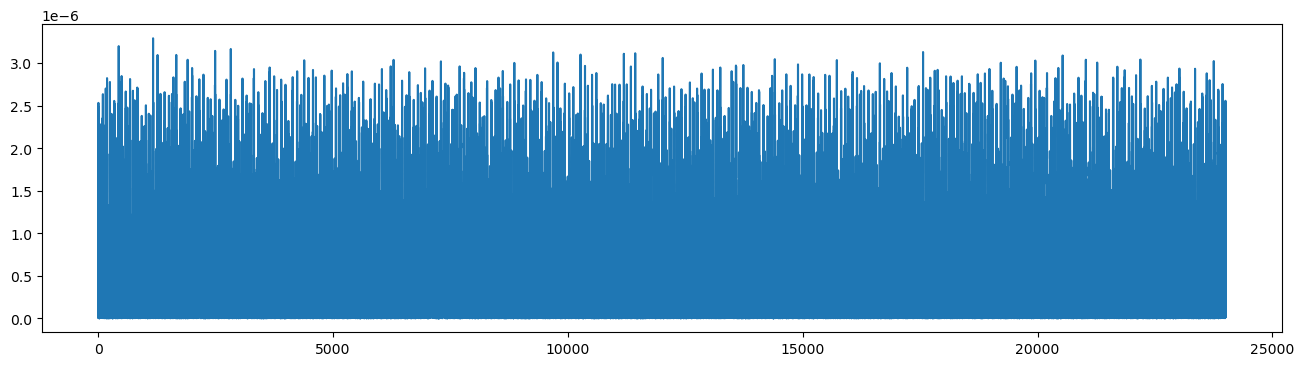

In [44]:
n_freq, n_fft = calc_fft(inner4['X112_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

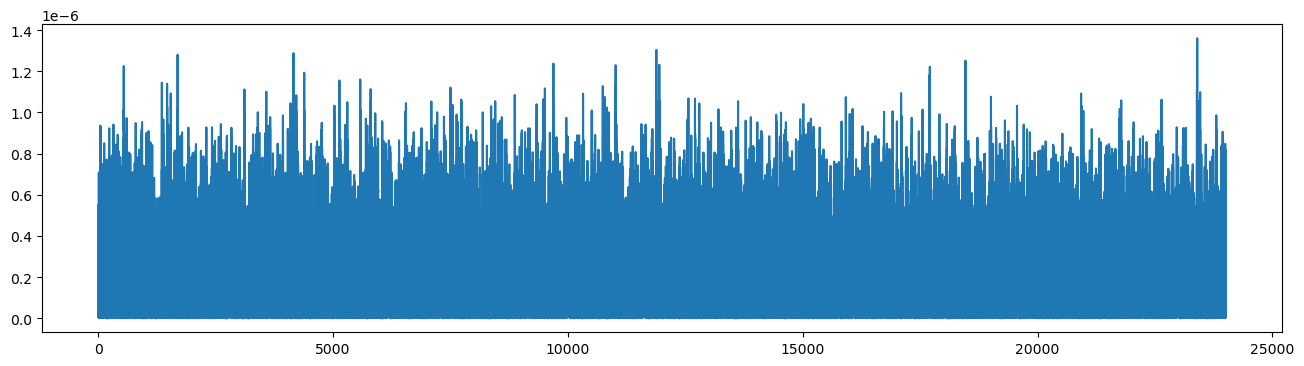

In [45]:
n_freq, n_fft = calc_fft(ball3['X125_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

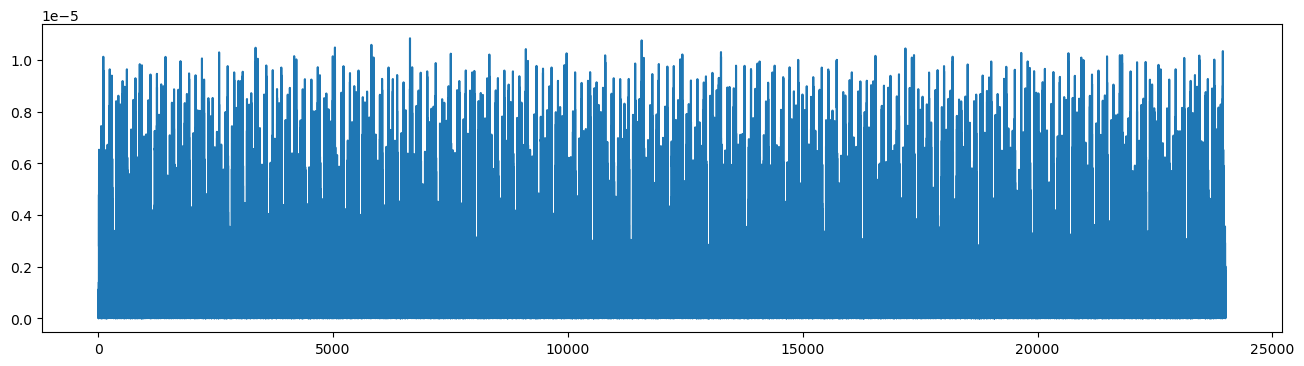

In [46]:
n_freq, n_fft = calc_fft(outer3['X138_DE_time'])
plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2]))

ValueError: x and y must have same first dimension, but have shapes torch.Size([243981]) and torch.Size([244271])

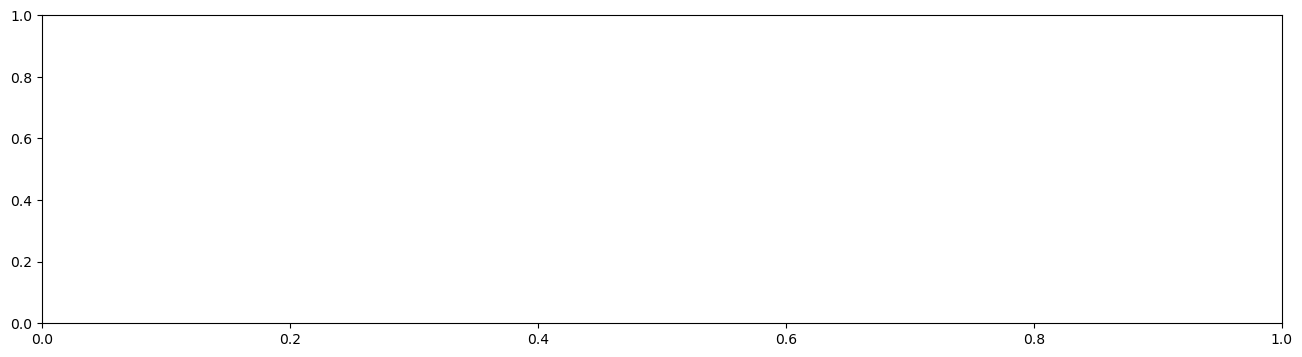

In [57]:
norm, normf = calc_fft(normal3['X100_DE_time'])
plt.figure(figsize=[16, 4])
# plt.plot(norm[1:len(n_fft)//2], np.abs(normf[1:len(normf)//2]).reshape(-1))

inner, innerf = calc_fft(inner4['X112_DE_time'])
# plt.figure(figsize=[16, 4])
plt.plot(inner[1:len(n_fft)//2], np.abs(innerf[1:len(innerf)//2]).reshape(-1))

ball, ballf = calc_fft(ball3['X125_DE_time'])
# plt.figure(figsize=[16, 4])
plt.plot(ball[1:len(n_fft)//2], np.abs(ballf[1:len(ballf)//2]).reshape(-1))

n_freq, n_fft = calc_fft(outer3['X138_DE_time'])
# plt.figure(figsize=[16, 4])
plt.plot(n_freq[1:len(n_fft)//2], np.abs(n_fft[1:len(n_fft)//2])).reshape(-1))

## 2. STFT

In [47]:
import torch

def get_stft(data):
    data = torch.Tensor(data)
    data = data.unsqueeze(0)
    stft_ = torch.stft(graph_data, n_fft=48000, win_length=4800)
    stft_data = torch.sqrt(stft_[:,:,:,0] ** 2 + stft_[:,:,:,1] ** 2)
    return stft_data[0]